In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
#import imf

In [3]:
def salpeter(M, alpha=2.35, xi_o=1.0):
    return xi_o * M**(1.0 - alpha)


def sample_IMF(N, IMF,  M_min = 0.1, M_max = 100.0, npoints = 1000, **kwargs):

    # bin IMF in logspace
    dm = np.log10(M_max / M_min) / (1.0*(npoints - 1))

    # m_o
    m_o = np.log10(M_min)

    i = np.arange(0, npoints)
    # cumulative probability density
    m        = 10.0**(m_o + i*dm)
    total_fn = IMF(m) 
    
    total_fn = np.cumsum(total_fn)
    total_fn = total_fn / (1.0* total_fn[-1])
    IMF_vals = total_fn
    # determine mass sample points
    #M_sample = np.logspace(M_min, M_max, npoints)
 
    # sample the IMF 
    #IMF_vals = IMF(M_sample, **kwargs)
    #IMF_vals = IMF_vals / (1.0*np.sum(IMF_vals))
    #IMF_vals = np.cumsum(IMF_vals)

    # normalize to one


    random_numbers = np.random.rand(N)
    # now sample


   # print IMF_vals
    # do a bisect search for each number
    mass_sample = np.zeros(N)

    for i in np.arange(N):
        bin_number = npoints / 2
        width = npoints / 2 
        while ( width > 1):
            width = width / 2
            if (random_numbers[i] > IMF_vals[bin_number]):
                bin_number = bin_number + width
            elif (random_numbers[i] < IMF_vals[bin_number]):
                bin_number = bin_number - width
        
          #  print random_numbers[i], IMF_vals[bin_number], bin_number, width
            
       # print i
        mass_sample[i] = 10.0**(bin_number *dm)
            

    return mass_sample

In [4]:
M_min   = 1.0
M_max   = 100.0
npoints = 100
M       = np.logspace(np.log10(M_min), np.log10(M_max), npoints)
IMF     = salpeter(M)


In [22]:
# attempt at sampling
N_stars  = 10000
M_sample = sample_IMF(N_stars, salpeter, M_min = M_min, M_max = M_max, npoints = 1000)

# now get a histogram of M_sample
npoints  = 25
bins     = np.logspace(np.log10(M_min), np.log10(M_max), npoints)
M_hist, bins   = np.histogram(M_sample, bins = bins)
centers  = 0.5*(bins[1:] + bins[0:-1])

A = N_stars * (1.0-2.35+1) / (1.0/(M_max)**(1.0-2.35+1) - 1.0/(M_min)**(1.0-2.35+1))


[]

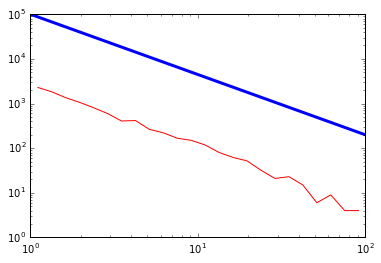

In [23]:
plt.plot(M, 1.0E5*IMF, lw = 3, label = 'Salpeter Actual')

plt.plot(centers, M_hist, color = 'red')

plt.loglog()

In [7]:
print A

-872.410611962
